<a href="https://colab.research.google.com/github/Raynould-Joseph/Machine-Learning-/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
%cd /content/drive/MyDrive/ML LAB/MeteoriteLandings/meteorite-landings/

[Errno 2] No such file or directory: '/content/drive/MyDrive/ML LAB/MeteoriteLandings/meteorite-landings/'
/content


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ML Lab/catalog123.csv')

In [4]:
df.head()


,id,date,continent_code,country_name,country_code,state/province,population,city/town,distance,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,fatalities,source_name,source_link
0,34,3/2/2007,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/2007,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/2007,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/2007,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/2007,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,0.0,Matthew Crawford (KGS),NaN


In [5]:
df.isnull().sum()

id                   0
date                 3
continent_code    1529
country_name         0
country_code         0
state/province       1
population           0
city/town            4
distance             1
latitude             1
longitude            1
geolocation          1
hazard_type          0
landslide_type       1
landslide_size       1
trigger              2
fatalities         247
source_name        821
source_link        100
dtype: int64

In [6]:
df=df.fillna(df.mean())

In [7]:
df.isnull().sum()

id                   0
date                 3
continent_code    1529
country_name         0
country_code         0
state/province       1
population           0
city/town            4
distance             0
latitude             0
longitude            0
geolocation          1
hazard_type          0
landslide_type       1
landslide_size       1
trigger              2
fatalities           0
source_name        821
source_link        100
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

id                0
date              0
continent_code    0
country_name      0
country_code      0
state/province    0
population        0
city/town         0
distance          0
latitude          0
longitude         0
geolocation       0
hazard_type       0
landslide_type    0
landslide_size    0
trigger           0
fatalities        0
source_name       0
source_link       0
dtype: int64

In [10]:
df.describe()

,id,population,distance,latitude,longitude,fatalities
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,4990.708333,1.970611e+05,10.313052,0.935542,-75.849696,5.142433
std,2410.282238,3.964134e+05,10.094709,4.248897,5.759310,13.650793
min,77.000000,0.000000e+00,0.000030,-9.388400,-79.781100,0.000000
25%,3955.750000,5.058500e+03,1.741488,-2.003625,-78.506425,0.000000
50%,6089.500000,1.519400e+04,8.126280,0.699350,-76.930600,1.729599
75%,6724.500000,1.635592e+05,16.502470,3.087300,-75.405150,5.000000
max,7513.000000,1.399814e+06,45.697920,10.474100,-48.890700,92.000000


In [11]:
df['country_name'].unique()

array(['Colombia', 'Ecuador', 'Brazil', 'Peru'], dtype=object)

In [12]:
df.head()

,id,date,continent_code,country_name,country_code,state/province,population,city/town,distance,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,fatalities,source_name,source_link
7,77,5/21/2007,SA,Colombia,CO,Risaralda,440118,Pereira,0.62022,4.8081,-75.6941,"(4.8080999999999996, -75.694100000000006)",Landslide,Mudslide,Large,Rain,13.000000,Reuters - AlertNet.org,http://www.reuters.com/news/video/videoStory?v...
8,105,6/27/2007,SA,Ecuador,EC,Zamora-Chinchipe,15276,Zamora,0.47714,-4.0650,-78.9510,"(-4.0650000000000004, -78.950999999999993)",Landslide,Landslide,Medium,Downpour,1.459198,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
9,106,6/27/2007,SA,Ecuador,EC,Loja,117796,Loja,0.35649,-3.9900,-79.2050,"(-3.99, -79.204999999999998)",Landslide,Landslide,Medium,Downpour,1.459198,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
10,107,6/27/2007,SA,Ecuador,EC,Pichincha,5114,Sangolquí,33.94603,-0.3560,-78.1480,"(-0.35599999999999998, -78.147999999999996)",Landslide,Landslide,Medium,Downpour,1.459198,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
48,307,10/13/2007,SA,Colombia,CO,Cauca,9985,Suárez,8.46579,2.9437,-76.7719,"(2.9437000000000002, -76.771900000000002)",Landslide,Mudslide,Large,Continuous rain,24.000000,Reuters - AlertNet.org,http://www.reuters.com/article/newsOne/idUSN13...


In [13]:
lis=df.iloc[:,[6,16]].values
lis

array([[4.40118000e+05, 1.30000000e+01],
       [1.52760000e+04, 1.45919779e+00],
       [1.17796000e+05, 1.45919779e+00],
       [5.11400000e+03, 1.45919779e+00],
       [9.98500000e+03, 2.40000000e+01],
       [4.89200000e+03, 1.45919779e+00],
       [4.44400000e+03, 5.00000000e+00],
       [2.00421000e+05, 3.00000000e+00],
       [9.50100000e+03, 4.00000000e+00],
       [7.21398000e+05, 0.00000000e+00],
       [1.01910000e+04, 4.00000000e+00],
       [1.39981400e+06, 5.00000000e+00],
       [1.63007000e+05, 3.00000000e+00],
       [9.82900000e+03, 5.00000000e+00],
       [1.22050000e+04, 1.00000000e+01],
       [8.39270000e+04, 6.00000000e+00],
       [1.65216000e+05, 1.40000000e+01],
       [2.65820000e+04, 0.00000000e+00],
       [1.30337000e+05, 6.00000000e+00],
       [3.94200000e+03, 5.00000000e+00],
       [1.09100000e+03, 5.00000000e+00],
       [2.47986000e+05, 2.00000000e+00],
       [9.89600000e+03, 1.00000000e+00],
       [5.71820000e+05, 2.00000000e+00],
       [2.624600

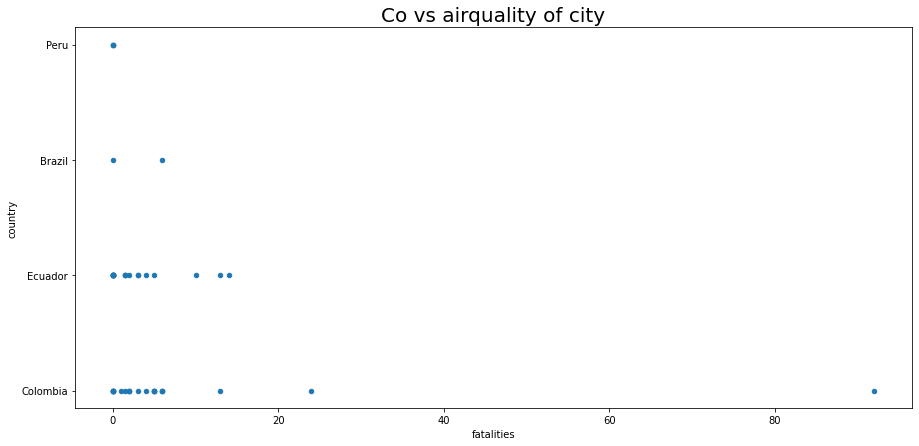

In [15]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Co vs airquality of city', fontsize = 20)
plt.xlabel('fatalities')
plt.ylabel('country')
plt.scatter( x = 'fatalities', y = 'country_name', data = df, s =20)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)

In [16]:
X1 = df[['population' , 'fatalities']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [17]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)
Kmean.fit(X1)

KMeans(n_clusters=4)

In [18]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

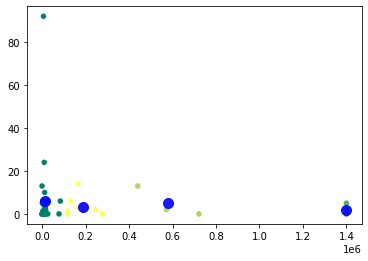

In [25]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

In [19]:
Kmean.cluster_centers_

array([[1.34330000e+04, 6.10554979e+00],
       [1.39981400e+06, 1.75000000e+00],
       [5.77778667e+05, 5.00000000e+00],
       [1.88498556e+05, 3.27324420e+00]])

In [20]:
Kmean.labels_

array([2, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 0], dtype=int32)

In [22]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)


array([0], dtype=int32)

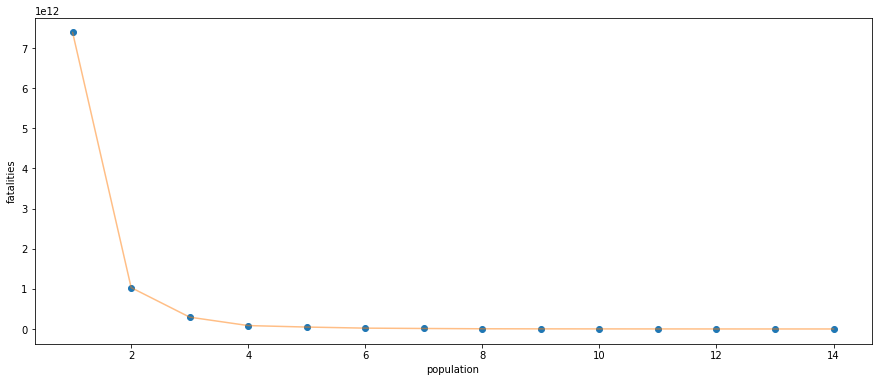

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('population') , plt.ylabel('fatalities')
plt.show()

In [45]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
centroids1

array([[8.92930000e+03, 6.31258645e+00],
       [1.39981400e+06, 1.75000000e+00],
       [7.21398000e+05, 0.00000000e+00],
       [2.50583750e+05, 1.25000000e+00],
       [1.22304143e+05, 4.35131397e+00],
       [5.05969000e+05, 7.50000000e+00]])

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 